In [1]:
import mxnet as mx 
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from importlib import import_module

/home/ubuntu/anaconda3/envs/mxnet_p27/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/mxnet_p27/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


(<mxnet.io.MXDataIter object at 0x7f80ac2fe490>, <mxnet.io.MXDataIter object at 0x7f801d0f93d0>)
(128L, 3L, 28L, 28L)
DataDesc[softmax_label,(128L,),<type 'numpy.float32'>,NCHW]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


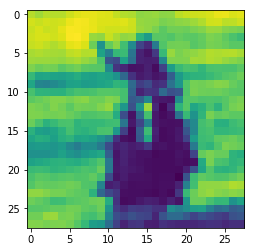

In [2]:
# 1. data reading
# labels in order: 
"""
0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck
"""

Image_shape = (3,28,28)  # 这里为什么不能用(3,32,32)?
Pad_value =4
def get_cifar10():
    # TODO fill all the blanks 
    # Hint
    # rgb mean default: '123.68,116.779,103.939',
    # pad size: whatever you think is valid, pad to 32 is good 
    # image shape:  the image shape feed into the network, e.g. (3,224,224)')
    # num-classes: the number of classes
    # num-examples:  the number of training examples, 50000 :)
    # data-nthreads: default=4,number of threads for data decoding, how many cpus do you have
    # dtype: default is float32, can be data type: float32 or float16')
    train = mx.io.ImageRecordIter(
            path_imgrec         = "./cifar10_train.rec",
            label_width         = 1,
            mean_r              = 123.68,
            mean_g              = 116.779,
            mean_b              = 103.939,
            data_name           = 'data',
            label_name          = 'softmax_label',
            data_shape          = Image_shape,
            batch_size          = 128,
            pad                 = Pad_value,
            fill_value          = 0,
            preprocess_threads  = 4,
            shuffle             = True)
    val = mx.io.ImageRecordIter(
            path_imgrec         = "./cifar10_val.rec",
            label_width         = 1,
            mean_r              = 123.68,
            mean_g              = 116.779,
            mean_b              = 103.939,
            data_name           = 'data',
            label_name          = 'softmax_label',
            data_shape          = Image_shape,
            batch_size          = 128,
            pad                 = Pad_value,
            fill_value          = 0,
            preprocess_threads  = 4,
            shuffle             = 0)
    return train, val

train, val = get_cifar10()
# TODO write the script to look what is inside train and val
# Check the image size, and label 
# Display the image 
# Question? check MXNET_course/mxnet-week3/cifar10/step_by_step_debug.ipynb
print (train, val)
print (train.provide_data[0].shape)
print (train.provide_label[0])
i = 0
for each in train:
    i+=1
    if i>5:
        break
print each
batch_numpy = each.data[0].asnumpy()
label_numpy = each.label[0].asnumpy()
print (type(batch_numpy))
print (type(label_numpy))

randidx = 1
img = batch_numpy[randidx]
img = np.squeeze(img).sum(axis=0)
#plt.imshow(img, cmap='gray')
plt.imshow(img)
plt.show()

#print(train.provide_data[0].data[0].asnumpy())
#plt.imshow(train.provide_data[0][0].asnumpy()) # asnumpy is the magic communicating numpy and mxnet NDarray 
#plt.show()

# 老师，image_size 可以选（3,32,32）吗？

['data', 'bn_data_gamma', 'bn_data_beta', 'conv0_weight', 'stage1_unit1_bn1_gamma', 'stage1_unit1_bn1_beta', 'stage1_unit1_conv1_weight', 'stage1_unit1_bn2_gamma', 'stage1_unit1_bn2_beta', 'stage1_unit1_conv2_weight', 'stage1_unit1_sc_weight', 'stage1_unit2_bn1_gamma', 'stage1_unit2_bn1_beta', 'stage1_unit2_conv1_weight', 'stage1_unit2_bn2_gamma', 'stage1_unit2_bn2_beta', 'stage1_unit2_conv2_weight', 'stage1_unit3_bn1_gamma', 'stage1_unit3_bn1_beta', 'stage1_unit3_conv1_weight', 'stage1_unit3_bn2_gamma', 'stage1_unit3_bn2_beta', 'stage1_unit3_conv2_weight', 'stage2_unit1_bn1_gamma', 'stage2_unit1_bn1_beta', 'stage2_unit1_conv1_weight', 'stage2_unit1_bn2_gamma', 'stage2_unit1_bn2_beta', 'stage2_unit1_conv2_weight', 'stage2_unit1_sc_weight', 'stage2_unit2_bn1_gamma', 'stage2_unit2_bn1_beta', 'stage2_unit2_conv1_weight', 'stage2_unit2_bn2_gamma', 'stage2_unit2_bn2_beta', 'stage2_unit2_conv2_weight', 'stage2_unit3_bn1_gamma', 'stage2_unit3_bn1_beta', 'stage2_unit3_conv1_weight', 'stage2_un

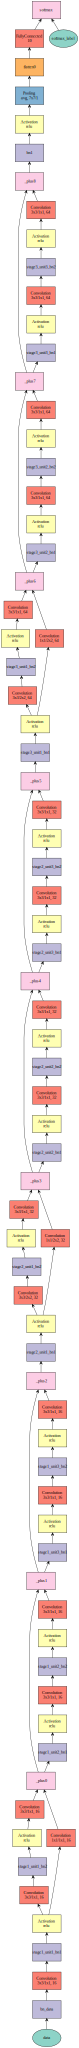

In [3]:
# 2 model getting 
# TODO read through resnet.py file for understanding
def get_resnet():
    net = import_module('resnet')
    sym = net.get_symbol(10,20,'3,28,28')  # 这里为什么不能用"3,32,32" 的size
    return sym 
sym = get_resnet()

# TODO 
# 1. Plot and visualize the network. Put your comments about its architecture (why bottlenet)
# 2. List all weight and output (Question? check MXNET_course/mxnet-week3/cifar10/step_by_step_debug.ipynb)
# Hint: check mx.viz.plot
arg_name = sym.list_arguments()
out_name = sym.list_outputs()
print (arg_name)
print (out_name)
mx.viz.plot_network(sym,hide_weights=True,save_format='pdf',title='resnet8')

(168, 220, 3)


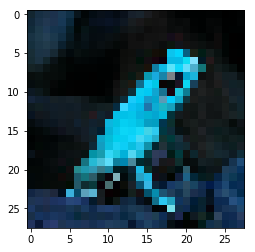

<type 'numpy.ndarray'>
(1, 3, 28, 28)


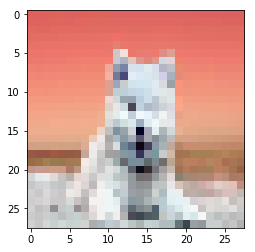

<type 'numpy.ndarray'>
(1, 3, 28, 28)
The very small training dataset contain:  (2, 3, 28, 28)
small dataset is:  <class 'mxnet.io.NDArrayIter'>
DataBatch: data shapes: [(1L, 3L, 28L, 28L)] label shapes: [(1L,)]
DataBatch: data shapes: [(1L, 3L, 28L, 28L)] label shapes: [(1L,)]
[[  2.33965479e-02   8.34496856e-01   1.96023844e-02   1.59029049e-04
    7.03412734e-05   5.15932450e-04   8.25445913e-03   2.89673771e-04
    3.15694250e-02   8.16454887e-02]
 [  1.22329755e-08   9.99257267e-01   1.34834431e-06   6.37660650e-21
    1.55978718e-17   4.10796207e-14   3.59012464e-09   3.55602659e-14
    5.90373937e-04   1.50934138e-04]]


In [4]:
# 3 sanity check random image inference
img1 = cv2.imread("frog.jpg")
print(img1.shape)
img1 = cv2.resize(img1,(28,28))# you need to pad it if you do padding for you nework
plt.imshow(img1)
plt.show()
print type(img1)
img1 = img1.transpose((2,0,1)).reshape((1,3,28,28))
print img1.shape

img2 = cv2.imread("dog.jpg")
img2 = cv2.resize(img2,(28,28))# you need to pad it if you do padding for you nework
plt.imshow(img2)
plt.show()
print type(img2)
img2 = img2.transpose((2,0,1)).reshape((1,3,28,28))
print img2.shape

img = np.vstack([img1,img2])
print "The very small training dataset contain: ", img.shape

# TODO: figure out how to convert numpy array to mx.nd.array
img_mxnd = mx.nd.array(img,ctx=mx.gpu()) 
label_mxnd = mx.nd.array([6,5],ctx=mx.gpu()) # 6 is frog, give 6 as label
img_itr = mx.io.NDArrayIter(data=img_mxnd, data_name='data', 
                            label_name='softmax_label', label=label_mxnd, 
                            batch_size=1) # ??? Hint the name should "data" and softmax_label


print "small dataset is: ", type(img_itr)
for each in img_itr:
    print each

# TODO bind the random img to network 
# question? check mxnet-week3/cifar10/train_cifar10.py
mod = mx.mod.Module(context=[mx.gpu()],
                        symbol=sym,
                        data_names=['data'],
                        label_names=['softmax_label'])

mod.bind(img_itr.provide_data,img_itr.provide_label)  ############
mod.init_params(mx.init.Xavier(magnitude=2.0)) 

# run forward perdiction 
# TODO fill the mod.predict 
# check mod.predict
out = mod.predict(img_itr)  
print out.asnumpy()

In [5]:
print np.argmax(out.asnumpy(),axis=1)

[1 1]


In [6]:
# 4 overfit small dataset 
# TODO fill all ???
mod.init_optimizer('sgd',optimizer_params=(('learning_rate', 0.1), )) 
# run forward perdiction
metric = mx.metric.create('acc')

for epoch in range(5):
    img_itr.reset()
    metric.reset()
    for batch in img_itr:
        mod.forward(batch, is_train=True)
        mod.update_metric(metric, batch.label)
        mod.backward()
        mod.update()
    print ('Epoch {}, Train {}'.format(epoch, metric.get()))
    # You should get 100% accuacy on these two images


Epoch 0, Train ('accuracy', 0.0)
Epoch 1, Train ('accuracy', 0.5)
Epoch 2, Train ('accuracy', 0.0)
Epoch 3, Train ('accuracy', 0.0)
Epoch 4, Train ('accuracy', 0.0)


# 为什么没有overfitting? 是因为我的 选了狗 和青蛙？

In [7]:
#5 (optional) train cifar10 on resnet(~epoch) if you have GPU. Build the training script from week2
mod_cifar = mx.mod.Module(context=[mx.gpu()],
                        symbol=sym,
                        data_names=['data'],
                        label_names=['softmax_label'])
train.reset()
val.reset()
mod_cifar.fit(train_data=train,
              eval_data=val,
              num_epoch=10,
              optimizer='sgd', 
              optimizer_params={'learning_rate':0.01, 'momentum': 0.9}, 
              epoch_end_callback=mx.callback.do_checkpoint('resnet_cifar_10'),
              initializer=mx.init.Xavier(rnd_type='gaussian', factor_type='in',magnitude=2),
              batch_end_callback=[mx.callback.Speedometer(128, 1)], 
              eval_metric=['acc','ce'])

# 老师，为什么没有打印出来的东西？

In [8]:
# 6 (optional) Wild test on your model 

In [9]:
# run forward perdiction 
# TODO fill the mod.predict 
# check mod.predict
out = mod.predict(img_itr)  
print out.asnumpy()
print np.argmax(out.asnumpy(),axis=1)

[[ 0.00610314  0.00985075  0.00515167  0.00428405  0.00680459  0.40435332
   0.55098444  0.00253885  0.00385076  0.00607847]
 [ 0.01639426  0.01283839  0.0265356   0.01804588  0.01610108  0.50078511
   0.34409389  0.01352055  0.0222916   0.02939362]]
[6 5]


# 噢耶，预测对了啊 ！！！！ 上次预测结果是【5,5】，是不是因位layer太少了，上次traing 的不好？ 重新跑了一下，就对了